## Unidad 2:

### Cálculo Numérico

- Diferenciación.

**1.** En un cirtcuito con un voltaje de  y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación
$$\epsilon(t)=L\frac{di}{dt}+Ri$$

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

$$t = 1.00, 1.01, 1.02, 1.03, 1.0$$

$$i = 3.10, 3.12, 3.14, 3.18, 3.24$$

donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 , para ello realice lo siguiente:

**A** Construya un data frame de pandas con los valores de tiempo y corriente

**B** Emplee un metodo calcular la derivada numérica.

**C** Use la ley de kirshhoff para encontrar $\epsilon$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
# A) data frame de pandas con los valores de tiempo y corriente
t = [1, 1.01, 1.02, 1.03, 1.04] #segundos
i = [3.10, 3.12, 3.14, 3.18, 3.24] #amperes
L = 0.98 #henrios
R = 0.142 #ohms

data = pd.DataFrame({'tiempo(s)': t, 'corriente(A)': i})
data.head(3)

,tiempo(s),corriente(A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14


In [3]:
# B) Método calcular la derivada numérica.

def derivada_discreta(x,y):
  dy=[]
  for i in range(1,len(x)):
    d=(y[i]-y[i-1])/(x[i]-x[i-1])
    dy.append(d)
  return dy

derivada = derivada_discreta(data['tiempo(s)'], data['corriente(A)'])
derivada.append(derivada[-1]) #agregar el último valor
derivada

[2.0, 2.0, 4.0, 6.0, 6.0]

In [4]:
# C) Ley de kirchhoff para encontrar e(t)
e = L * np.array(derivada) + R * np.array(data['corriente(A)'])
e

array([2.4002 , 2.40304, 4.36588, 6.33156, 6.34008])

**2.** Supongamos que tienes una muestra de material radiactivo y deseas determinar la velocidad a la que disminuye la cantidad de material radioactivo en función del tiempo. El decaimiento radioactivo sigue una ley exponencial y se puede describir mediante la siguiente ecuación:

$$N(t)=N_0e^{-\lambda t}$$

Donde:

$N(t)$ es la cantidad de material radioactivo en el tiempo $t$

$N_0$ es la cantidad inicial de material radioactivo.

$\lambda$ es una constante de decaimiento

$t$ es el tiempo

Para encontrar la tasa de cambio de $N(t)$ con respecto al tiempo $t$, es decir, la velocidad de decaimiento radioactivo, puedes calcular la derivada de $N(t)$ con respecto a $t$:

**A** Encuentre la velocidad de decaimiento usando la libreria simbololica, luego paselo a una libreria numerica y grafique.

**B** Encuentre la velocidad de decaimiento, usando la aproximación de la derivada y grafique.

tome $λ=10^{-10}$ y $N_0=6.7x10^{21}$

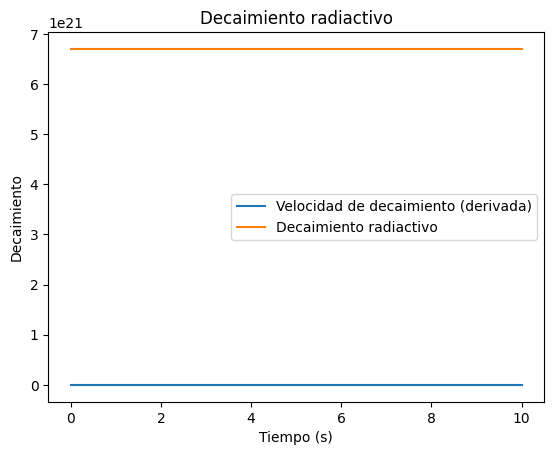

Función de decaimiento radiactivo: 6.7e+21*exp(-1.0e-9*t)
Derivada de la función de decaimiento radiactivo: -6700000000000.0*exp(-1.0e-9*t)


In [17]:
# Velocidad de decaimiento simbololica y numerica y gráfica
t = symbols('t')
N_0 = 6.7e21
lambda_ = 10e-10
# Forma simbolica del decaimiento radiactivo
decaimiento = N_0 * exp(-lambda_ * t)

# Forma numérica del decaimiento radiactivo
decaimiento_num = lambdify(t, decaimiento, modules=['numpy'])

# Derivada simbolica del decaimiento radiactivo
decaimiento_derivada = decaimiento.diff(t)

# Derivada numérica del decaimiento radiactivo
decaimiento_derivada_num = lambdify(t, decaimiento.diff(t), modules=['numpy'])

# Gráfica del decaimiento radiactivo
t_nuevo = np.linspace(0, 10, 100)
plt.plot(t_nuevo, decaimiento_derivada_num(t_nuevo), label='Velocidad de decaimiento (derivada)')
plt.plot(t_nuevo, decaimiento_num(t_nuevo), label='Decaimiento radiactivo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Decaimiento')
plt.title('Decaimiento radiactivo')
plt.legend()
plt.show()

print(f'Función de decaimiento radiactivo: {decaimiento}')
print(f'Derivada de la función de decaimiento radiactivo: {decaimiento_derivada}')

**3.** Imagina un péndulo simple (una masa suspendida en un hilo) que oscila de un lado a otro. Quieres determinar cómo cambia la aceleración de la masa en función del tiempo durante su oscilación. La aceleración del péndulo en función del ángulo de desplazamiento

θ se puede describir mediante la siguiente ecuación:

$$\frac{d^2θ}{dt^2}+\frac{g}{L}sin(θ)=0$$

$t$ = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

$θ$ = [  0,   9.6,  18.2,  24.9,28.9,  29.9,  27.7,  22.6,15.1,   6.0,  -3.7, -13.0,-21.0, -26.8, -29.7, -29.4,-26.1 , -20.0, -11.7,  -2.,7.4])

**A** Grafique la posicion vs el tiempo.

**B** calcule la primera derivada y grafique.

**C** Calcule la segunda derivada y grafique.

**4** Repita el ejercicio anterior, pero ahora usando la libreria scipy.

**5** Plantee y resuelva un ejercicio donde use métodos de derivada numérica en Python.